In [1]:
import keras
from keras import layers
from keras import regularizers

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)

In [2]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder1 = autoencoder.layers[-3]
decoder2 = autoencoder.layers[-2]
decoder3 = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder3(decoder2(decoder1(encoded_input))))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [5]:
from credo import load_data
import numpy as np
(x_train, _), (x_test, _) = load_data(use_worms=True)

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(10912, 784)
(496, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
43/43 [==============================] - 2s 12ms/step - loss: 0.3495 - val_loss: 0.0874
Epoch 2/100
43/43 [==============================] - 0s 7ms/step - loss: 0.0726 - val_loss: 0.0661
Epoch 3/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0606 - val_loss: 0.0561
Epoch 4/100
43/43 [==============================] - 0s 7ms/step - loss: 0.0524 - val_loss: 0.0497
Epoch 5/100
43/43 [==============================] - 0s 8ms/step - loss: 0.0483 - val_loss: 0.0472
Epoch 6/100
43/43 [==============================] - 0s 7ms/step - loss: 0.0468 - val_loss: 0.0466
Epoch 7/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0463 - val_loss: 0.0460
Epoch 8/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0458 - val_loss: 0.0456
Epoch 9/100
43/43 [==============================] - 0s 8ms/step - loss: 0.0454 - val_loss: 0.0453
Epoch 10/100
43/43 [==============================] - 0s 6ms/step - loss: 0.0448 - val_loss: 0.0439
Epoch 11

In [8]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

16/16 [==============================] - 0s 1ms/step


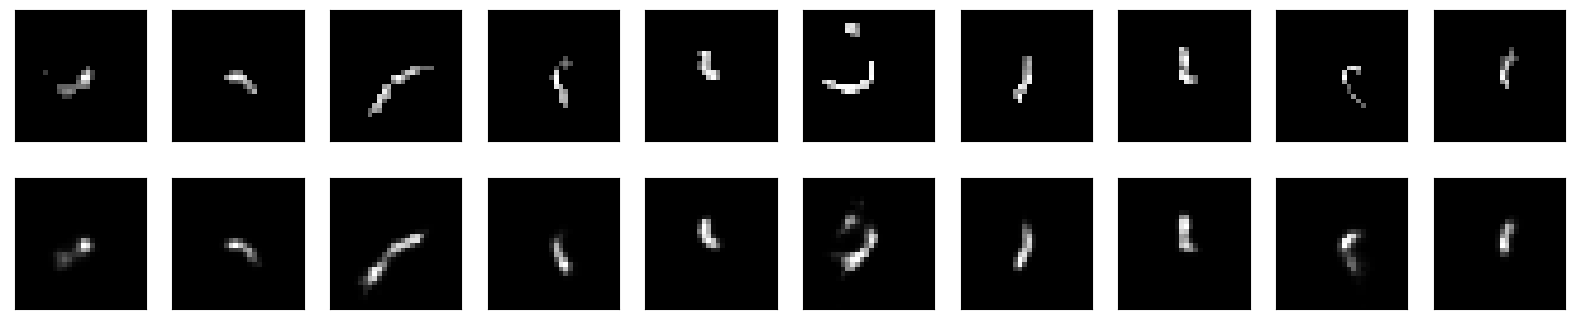

In [9]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()